In [3]:
import numpy as np
import sympy as sp
import math

import Lagrange_poly3 as p1
import Lagrange_poly4 as p2
import Polynomial_vec as p3
import Polynomial_dict as p4
import Polynomial as p5

import matplotlib.pyplot as plt

# Needed only in Jupyter to render properly in-notebook
%matplotlib inline

# Chinmai Raman

## Homework 7

## 7.8 Wrapping functions in a class
Visualizes $p_L(x)$ for x between the first and last interpolation point on a given function

p_L(1.2) = 0.93224
sin(1.2) = 0.932039


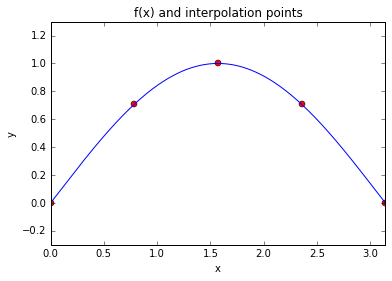

In [2]:
xp = np.linspace(0, np.pi, 5)
yp = np.sin(xp)

#Lagrange's interpolation polynomial
p_L = p1.LagrangeInterpolation(xp, yp)
x = 1.2
print 'p_L(%g) = %g' % (x, p_L(x))
print 'sin(%g) = %g' % (x, np.sin(x))
p_L.plot()

## 7.9 Flexibly handling function arguments
The LagrangeInterpolation class is now flexible in handling function arguments

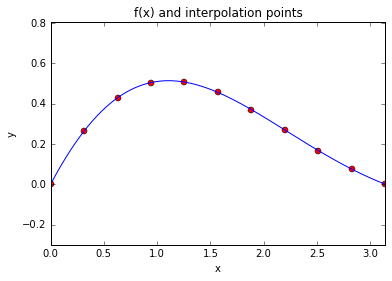

In [4]:
def myfunction(x):
    return np.exp(-x/2.0)*np.sin(x)

p_L2 = p2.LagrangeInterpolation(myfunction, [0, np.pi], 11)
p_L2.plot()

## 7.27 Vectorizing a class for polynomials

$f(x)=10+5x+4x^2$ for $x = 3$

In [11]:
poly = p3.Polynomial(np.array([10.0, 5.0, 4.0]))
poly(3)

61.0

In [4]:
poly = p3.Polynomial(np.array([10.0, 5.0, 4.0]))
str(poly)

float64


'10 + 5*x + 4*x^2'

In [3]:
poly = p3.Polynomial(np.array([10.0, 5.0, 4.0]))
poly.differentiate()
str(poly)

float64


'5 + 8*x^1'

The calculations in a case where $n = 3$ using the vectorized statements produces the same results as the original differentiate method

### Unvectorized

In [23]:
arr = []
for i in range(0, 1000):
    arr.append(i)
poly1 = p5.Polynomial(arr)

%timeit poly1 + poly1

10000 loops, best of 3: 107 µs per loop


### Vectorized

In [22]:
arr2 = np.zeros(1000)
for i in range(0, 1000):
    arr2[i] = i
poly2 = p3.Polynomial(arr2)

%timeit poly2 + poly2

1000 loops, best of 3: 247 µs per loop


### Unvectorized

In [6]:
%timeit poly1 * poly1

1 loops, best of 3: 425 ms per loop


### Vectorized

In [7]:
%timeit poly2 * poly2

1 loops, best of 3: 512 ms per loop


The add and mul functions in the unvectorized Polynomial Class are running faster than their counterparts in the vectorized Polynomial class. Despite changing the length of the coefficients, the unvectorized class remains faster. Why this is is unclear.

## 7.28 Using a dictionary to hold polynomial coefficients

In [9]:
poly = p4.Polynomial(np.array([1, 2, 0, 3]))
poly2 = p4.Polynomial(np.array([3, 4, 1, 0, 2]))
poly3 = poly + poly2

{0: 1, 1: 2, 3: 3}
{0: 3, 1: 4, 2: 1, 4: 2}
{0.0: 4.0, 1.0: 6.0, 2.0: 1.0, 3.0: 3.0, 4.0: 2.0}


In [10]:
poly = p4.Polynomial(np.array([0, 1, 0, 2]))
poly2 = p4.Polynomial(np.array([3, 0, 4]))
poly3 = poly * poly2

{1: 1, 3: 2}
{0: 3, 2: 4}
{1.0: 3.0, 3.0: 10.0, 5.0: 8.0}


In [8]:
arr3 = {}
for i in range(0, 1000):
    arr3[i] = i
poly3 = p4.Polynomial(arr3)

%timeit poly3 + poly3

10 loops, best of 3: 22.7 ms per loop


In [10]:
%timeit poly3 * poly3

1 loops, best of 3: 331 ms per loop


The add function is significantly slower using the dictionary implementation than both the vectorized and unvectorized versions. However the multiply function is faster. The positive of this implementation is that one can input functions of high order with zero coefficients much faster. Memory is also saved within the program from not having to store coefficients when they are zero. The negative is that testing is more difficult, as for example, the 'numpy.allclose()' function only works with arrays, and not dictionaries.